In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

# Laboration 3: Simulering och Konfidensintervall

## Simulering

I denna labb kommer lära oss hur vi genererar (pseudo)slumptal och använder dem för att simulera problem med hjälp av numpy.random.

Många av de kända fördelningrna har inbygda metoder för att generera slumptal från dem. Nedan ser vi ett exempel på hur vi kan dra slumptal från en standardardnormal fördelning.

In [10]:
x = np.random.normal(1)
x

1.5776009085545044

Vi kan också dra upprepade stickprov, t.ex. 3 stickprov av storlek 5 som nedan.

In [11]:
xx = np.random.normal(size=(5, 3))
xx 

array([[-0.40343533, -0.74678189,  1.22907012],
       [-1.30224214, -0.23247972, -1.11796945],
       [-0.44098257,  1.33810511,  0.55335894],
       [ 2.11139348,  0.85232618,  0.44422752],
       [-0.29778381, -0.92515446, -0.91871238]])

Den mest grundläggande fördelningen att generara slumptal från är från rektangelfördelningen $Re(0,1)$ med funktionen random.

In [12]:
antal=3
slumptal = np.random.uniform(size=antal)
print(slumptal)

[0.30775717 0.82619679 0.64902782]


Med hjälp av inversmetoden och dragningar från $Re(0,1)$ kan vi även simulera från fördelningar som inte finns inbyggda i numpy random. Exempelvis kan vi generera dragningar från en exponentialfördelad slumpvariabel $X\sim Exp(λ)$ med hjälp av sambandet
$x = -ln(1-u)/\lambda,$ givet att $u$ är ett slumptal från $Re(0,1)$.

Vidare kan vi simulera en exponentialfördelning genom att generera många tal på det sättet.
#### Ex. $X \sim Exp(2)$, simulera $X$ med 200 slumptal med Inversmetoden

Vi använder ett **normerat** histogram för att visualisera den simulerade fördelningen. Den jämförs med täthetsfunktionen $f(x) = 2exp(-2x)$

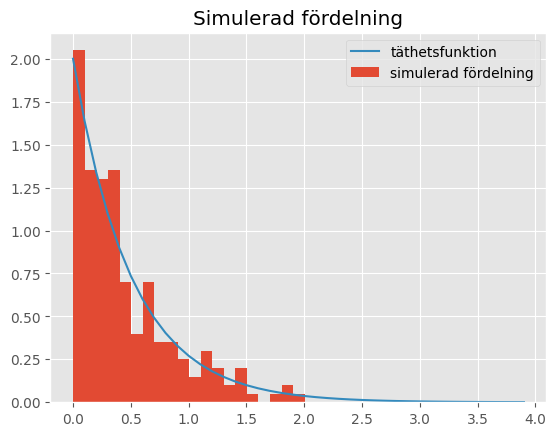

In [19]:
u = np.random.uniform(size=200)
_lambda = 2
x = -np.log(1-u)/_lambda

fig,ax = plt.subplots()
ax.hist(x,bins = 20,density=True)
_x = np.arange(0,4,0.1)
ax.plot(_x,_lambda*np.exp(-_lambda*_x))
ax.legend(["täthetsfunktion","simulerad fördelning"])
ax.set_title("Simulerad fördelning")
plt.show()

Kör vi cellen ovan några gånger så ser vi att vi får olika resultat varje gång(såklart), men ibland vill man att ens simuleringar skall visa samma sak vid varje körning för att ens resultat skall vara reproducerbara.

För att ett program ska generara samma slumptal varje körning (så att dina resultat ska vara reproducerbara) måste man specificera en generator. För att läsa mer hur en generator fungerar kan man läsa i [dokumentation](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator)

In [26]:
g = np.random.default_rng(98) # Välj valfritt positivt heltal som argument
g

Generator(PCG64) at 0x7DCCE31060A0

Den här gången, jämfört med när vi ovan drog slumptal från $Re(0,1)$, så får vi samma utfall varje gång!

In [39]:
antal=3
slumptal = g.random(antal)
print(slumptal)

[0.08455267 0.12678198 0.95372492]


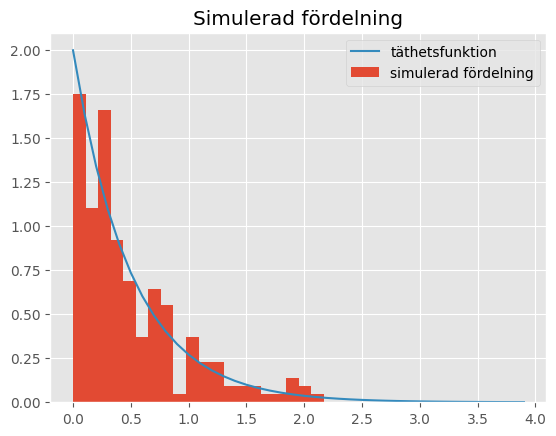

In [44]:
gen = np.random.default_rng(1477)
u = gen.random(200)
_lambda = 2
x = -np.log(1-u)/_lambda

fig,ax = plt.subplots()
ax.hist(x,bins = 20,density=True)
_x = np.arange(0,4,0.1)
ax.plot(_x,_lambda*np.exp(-_lambda*_x))
ax.legend(["täthetsfunktion","simulerad fördelning"])
ax.set_title("Simulerad fördelning")
plt.show()

Dessa grundverktyg tillsammans med loopar och if-satser gör det möjligt att modellera komplicerade slumpsystem med hjälp av programmeringsspråk som Python.

## KonfidensIntervall

Vi tittar nu lite närmare på konfidensintervall—specifikt för en medelvärdes parameter i en normalfördelning—och förhoppningsvis med hjälp av lite simulering förtydliga innebörden bakom vad vi menar med "konfidens".

Vi börjar med att fixera vår slumpgenerator för reproducerbarhet, sedan drar vi
50 st stickprov av 100 observationer vardera från en $N(0,1)$ fördelning, sedan tar vi medelvärdet av varje stickprov.

In [45]:
g2 = np.random.default_rng(314)

In [46]:
# Låt oss generera ett antal stickprov a 100 som exempel
x = g2.normal(size=(100,50))
x_bar = np.mean(x,axis=0)

In [47]:
n_obs = 100
n_experiments = 50

In [48]:
std_err = 1.96/np.sqrt(n_obs)

Kom ihåg att ett $100(1-\alpha)\%$ konfidens intervall för medelvärdesparametern $\mu$ i en $N(\mu, \sigma^2)$ med känd varians $\sigma^2$, baserat på $n$ iid observationer ges av
$$ \bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}.$$

I vårt fall är $\sigma= 1$ och $z_{\alpha/2} = 1.96$.

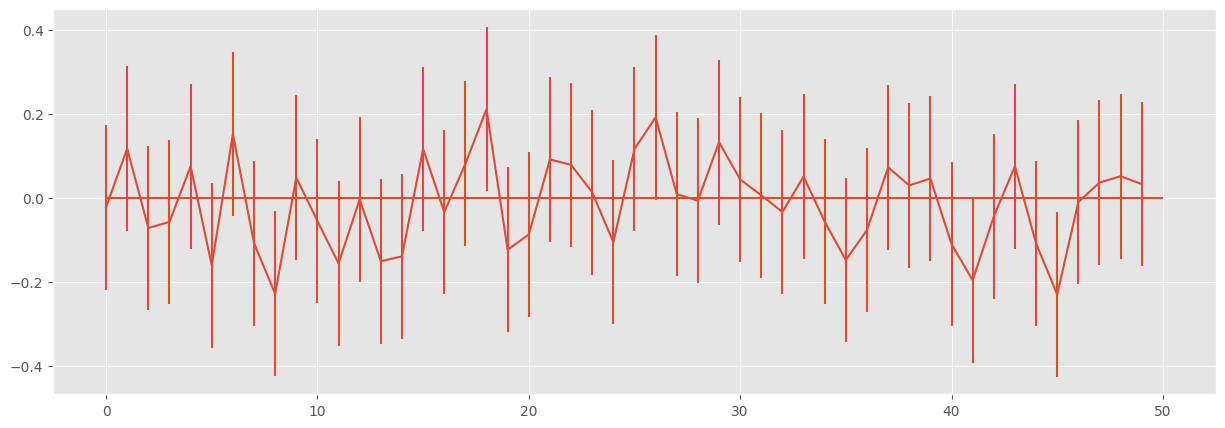

In [49]:
plt.figure(figsize=(15,5))
plt.errorbar(x=np.arange(n_experiments),y=x_bar, yerr=std_err)
plt.hlines(xmin=0,xmax=n_experiments,y=0)

* I ovanstående graf ser vi 50 st konfidensintervall som visas, vi ser att några passerar nollsträcket medan några andra gör det inte, vi ser att 3 st av 50 täcker inte nollan.
* Detta motsvarar ca 6% av intervallen täcker inte nollan.

Metoden vi använt konstruerar ett 95%-igt konfidenstintervall. Skulle vi fortsätta generera intervall som ovan, och ta proportionen av interval som inte täcker 0an mot de som gör det, så skulle den proportionen gå mot 5%.

Notera att varje intervall är av konfidensgrad 95%, men sannolikheten att ett givet intervall innehåller 0 eller inte är antingen 0 eller 1(när vi observerat datan så är det ju deterministiskt). Konfidensgraden syftar just på den långtgående proportionen av intervall som täcker 0, givet upprepade experiment.